# Workplace interaction

Import some plotting libraries and set some defaults:

In [1]:
import sys
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.set_context(context='paper', font_scale=0.8, rc=None)
# sns.set_context(context='notebook', font_scale=1, rc=None)

sns.set_style("ticks", {"axes.spines.top": False, 
                        "axes.spines.right": False,
                       "legend.edgecolor": 'white'})
import random
random_seed = 5

sys.path.append('..')
from global_params import load_params

In [2]:
%%html
<style> table { font-variant-numeric: tabular-nums; } </style>

> **Tip:**  
> Producing figures in svg format (scalable vector graphics) makes for sharp plots on webpages. However, if you make plots with thousands of observations you should set this to `'png'` instead:

In [3]:
%config InlineBackend.figure_formats = ['retina'] 

> **Tip:**  
> Some values apply globally to your analysis. E.g., sample sizes, cutoffs, names, rates, etc. Keeping those in a a yml file like `interaction_params.yml` and loading them in each notebook avoids the risk of manually adding/updating them in each notebook where they are used. You can use the `load_globals` function imported above from `global_params.py` to produce an object holding all the global values:

In [4]:
params = load_params('../global_params.yml')
params

{'sample_size': 24}

In [5]:
params.sample_size

24

## Sampling

In [6]:
subjects = pd.read_csv('../data/data_table.csv')
assert subjects.index.size == params.sample_size
subjects

,name,age,sex,position,nationality
0,Julie,27,F,PhDstudent,DK
1,Thomas,33,M,Postdoc,GB
2,Emilie,23,F,PhDstudent,CH
3,Sofie,31,F,Postdoc,DK
4,Sara,29,F,Postdoc,US
5,Cecilie,34,F,Postdoc,DK
6,Anders,32,M,PhDstudent,UK
7,Emma,42,F,Professor,DK
8,Caroline,31,F,PhDstudent,DK
9,Laura,30,F,Postdoc,DK


> **Tip:**  
> By adding a label and caption to a cell displaying a table, you can refer to that table elsewhere and insert it in a manuscript.

In [7]:
#| label: tbl-subjects
#| tbl-cap: "People included in the analysis."
with pd.option_context('display.max_rows', None,): # prints *all* rows
    display(subjects.style.hide()) # .style.hide() hides the index)

name,age,sex,position,nationality
Julie,27,F,PhDstudent,DK
Thomas,33,M,Postdoc,GB
Emilie,23,F,PhDstudent,CH
Sofie,31,F,Postdoc,DK
Sara,29,F,Postdoc,US
Cecilie,34,F,Postdoc,DK
Anders,32,M,PhDstudent,UK
Emma,42,F,Professor,DK
Caroline,31,F,PhDstudent,DK
Laura,30,F,Postdoc,DK


> **Tip:**  
> By generaing markdown for descriptions that will eventually end up in the manuscript, you can imbed python values. It also ensures that the manuscript exactly reflects the notebook.

In [8]:
#| echo: false
#| label: doc-sampling
Markdown(f"""

The {params.sample_size} subjects from workplaces in Denmark were interviewed .... blah blah 
blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah 
blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah 
""")



The 24 subjects from workplaces in Denmark were interviewed .... blah blah 
blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah 
blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah 


## Interviews

In interviewed `{python} params.sample_size` workplace individuals were interviewed by .... blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, 
blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, 

In [9]:
# generate some random sample data
scores = pd.DataFrame({
    'name': subjects.name, 
    'informality': np.random.normal(loc=10, scale=1, size=params.sample_size)
})
data = pd.merge(subjects, scores, on='name')
data

,name,age,sex,position,nationality,informality
0,Julie,27,F,PhDstudent,DK,8.779072
1,Thomas,33,M,Postdoc,GB,9.700923
2,Emilie,23,F,PhDstudent,CH,10.789367
3,Sofie,31,F,Postdoc,DK,9.630442
4,Sara,29,F,Postdoc,US,10.024875
5,Cecilie,34,F,Postdoc,DK,10.139770
6,Anders,32,M,PhDstudent,UK,9.767401
7,Emma,42,F,Professor,DK,11.306375
8,Caroline,31,F,PhDstudent,DK,10.467308
9,Laura,30,F,Postdoc,DK,9.939146


(0.0, 11.532787900037105)

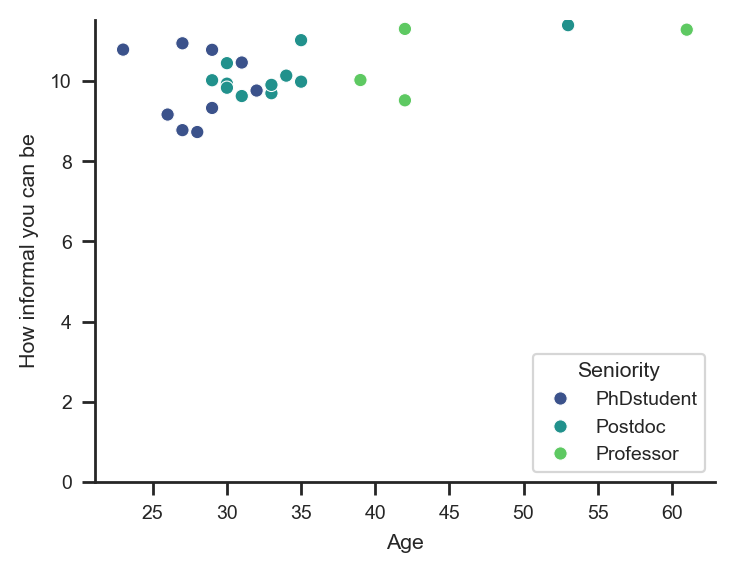

In [10]:
#| label: fig-danish-interaction
#| fig-cap: "Figure legends are defined alongside the figure in the notebook. The figure size in the notebook is determines its size when embedded in a document 4x3 inches."

plt.figure(figsize=(4,3))
sns.scatterplot(x='age', y='informality', data=data, hue='position', palette='viridis')
plt.ylabel('How informal you can be')
plt.xlabel('Age')
plt.legend(title='Seniority', loc='lower right')
plt.ylim(bottom=0)

or plotted differently:

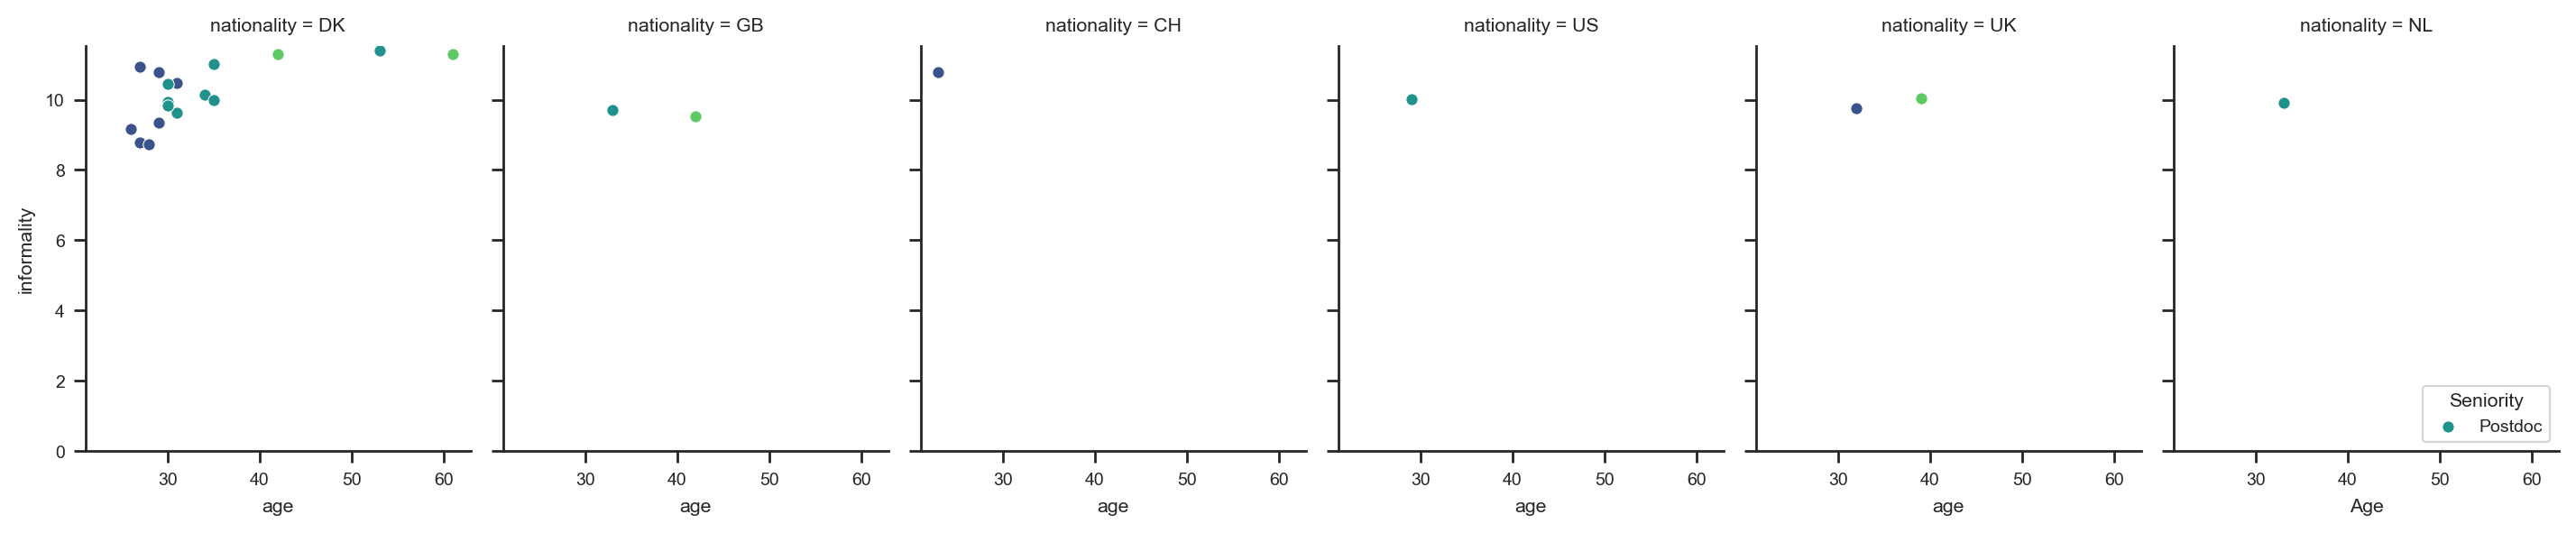

In [22]:
#| label: fig-danish-interaction-facets
#| fig-cap: "Figure legends are defined alongside the figure in the notebook. The figure size in the notebook is determines its size when embedded in a document 4x3 inches."

#plt.figure(figsize=(4,3))
g = sns.FacetGrid(data=data, col="nationality",hue="position", palette='viridis', aspect=0.8)
g.map(sns.scatterplot, 'age', 'informality')
#sns.scatterplot(x='age', y='informality', data=data, hue='position', palette='viridis')
plt.ylabel('How informal you can be')
plt.xlabel('Age')
plt.legend(title='Seniority', loc='lower right')
plt.ylim(bottom=0) ;

Seems Danish people act very informally unaffected by age and seniority.

In [32]:
informality_age_cor = data.informality.corr(data.age)
informality_age_cor

-0.16260214129883074

In [33]:
#| label: tbl-meaninformality
#| tbl-cap: "Mean interaction scores by position and nationality."

mean_informality = data.groupby(['position', 'nationality']).informality.mean().to_frame().reset_index()
mean_informality.sort_values('informality').style.hide() # hide index

position,nationality,informality
Professor,UK,8.949278
PhDstudent,CH,9.623167
Postdoc,NL,9.892308
Postdoc,DK,10.175595
PhDstudent,DK,10.220303
Professor,DK,10.234365
Postdoc,GB,10.431451
Postdoc,US,10.808717
Professor,GB,11.626458
PhDstudent,UK,11.709714


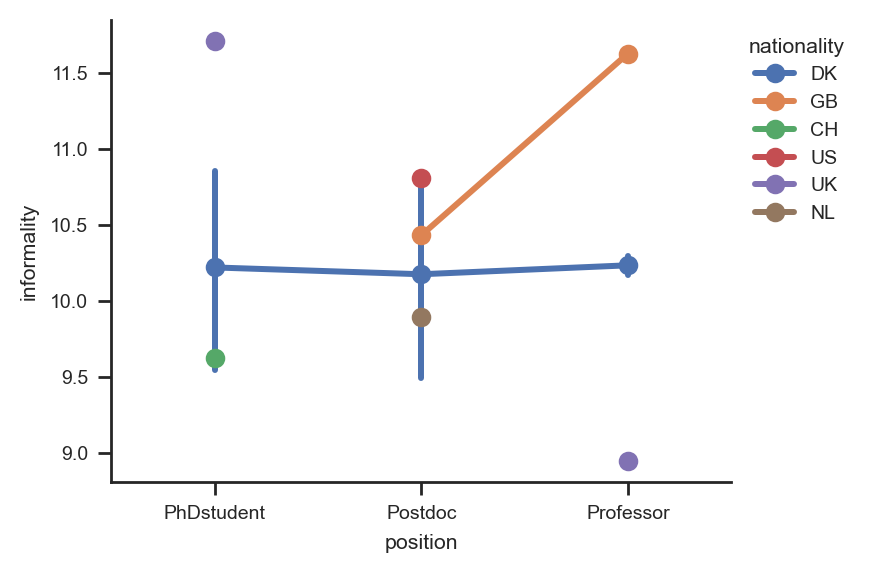

In [34]:
#| echo: false
#| label: fig-meaninformality
#| fig-cap: "Figure legends are defined alongside the figure in the notebook. The figure size in the notebook is determines its size when embedded in a document 4x3 inches."

plt.figure(figsize=(4,3))
g = sns.pointplot(data=data, x='position', y='informality', hue='nationality')
sns.move_legend(g, loc="upper left", bbox_to_anchor=(1, 1), frameon=False)

In [35]:
#| echo: false
#| label: doc-formality-correlation
Markdown(f"""
         
The correlation between informality and age was {round(informality_age_cor, 3)}.

""")


         
The correlation between informality and age was -0.163.



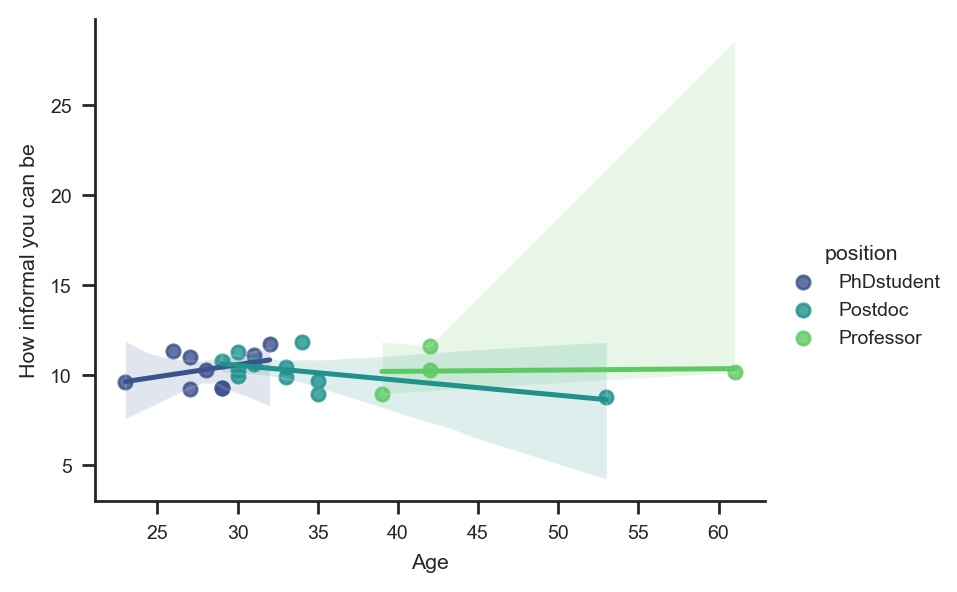

In [36]:
#| label: fig-danish-interaction-regressions
#| fig-cap: "Figure legends are defined alongside the figure in the notebook. The figure size in the notebook is determines its size when embedded in a document 4x3 inches."


sns.lmplot(x='age', y='informality', data=data, hue='position', palette='viridis', height=3, aspect=4/3)
plt.ylabel('How informal you can be')
plt.xlabel('Age') ;